In [1]:
# Think Complexity Chapter 5 / Cellular automata

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

In [3]:
# Here's a simple implementation of the 0-D CA I mentioned in the book, with one cell.

n = 10
x = np.zeros(n)# I use the NumPy function zeros to create an array of zeros
print(x)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [4]:
# To get the state of the cell in the next time step, we increment the current state mod 2.

x[1] = (x[0] + 1) % 2
x[1]

1.0

In [5]:
for i in range(2, n):
    x[i] = (x[i-1] + 1) % 2
print(x)

[0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]


In [6]:
# So the behavior of this CA is simple: it blinks.

In [7]:
# Just as we used a 1-D array to show the state of a single cell over time, we'll use a 2-D array to show the state
# of a 1-D CA over time, with one column per cell and one row per timestep.

In [8]:
rows = 5
cols = 11
array = np.zeros((rows, cols), dtype=np.uint8)
array[0, 5] = 1
print(array)

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


In [9]:
# To plote the array I use plt.imshow

def plot_ca(array):
    plt.imshow(array, cmap='Blues', interpolation='none')

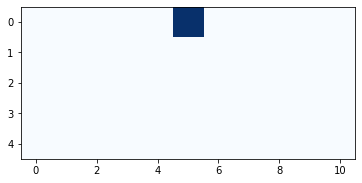

In [10]:
# Here's what it looks like after we initialize the first row.
plot_ca(array)

In [11]:
# And here's the function that fills in the next row. The rule for this CA is to take the sum of a cell
# and its two neighbors mod 2.

def step(array, i):
    """Compute row i of a CA."""
    rows, cols = array.shape
    row = array[i-1]# In this example, the lattice is finite, so the first and last cells have only one neighbor.
    # To handle this special case, I don't update the first and last column; thhey are always 0.
    for j in range(1,cols):
        elts = row[j-1:j+2]
        array[i, j] = sum(elts) % 2

In [62]:
print(array[0])

[0 0 0 0 0 1 0 0 0 0 0]


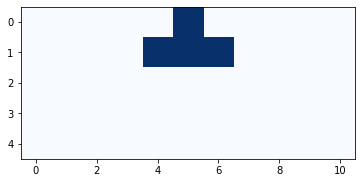

In [13]:
# Here's the second row.

step(array, 1)
plot_ca(array)

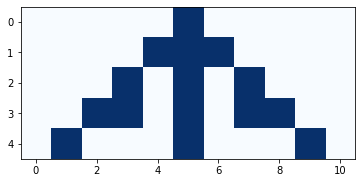

In [14]:
# And here's what it looks like with the rest of the cells filed in.

for i in range(1, rows):
    step(array, i)

plot_ca(array)

In [15]:
# For a simple set of rules, the behavior is more interesting than you might expect.

In [16]:
rows = 100
cols = 51
array = np.zeros((rows, cols), dtype=np.uint8)
array[0, 25] = 1
print(array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


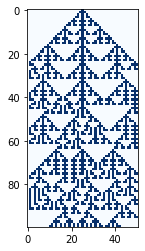

In [17]:
for i in range (1, rows):
    step(array, i)

plot_ca(array)

In [18]:
# We can update the CA more quickly using "cross correlation".
# The cross correlation of an array, a, with a window, w, is a new array, c, where element k is:nebrem napisati(slika?)
# In Python, we can compute element k like this:

def c_k(a, w, k):
    """Compute ekement k of the cross correlation of a and w."""
    N = len(w)
    return sum (a[k:k+N] * w)

In [19]:
# To see how this works, I'll create an array:
N = 10
row = np.arange(N, dtype=np.uint8)
print(row)

[0 1 2 3 4 5 6 7 8 9]


In [20]:
# And a window:
window = [1, 1, 1]
print(window)

[1, 1, 1]


In [21]:
# With this window, each element of c is the sum of three neighbors in the array:
c_k(row, window, 0)

3

In [22]:
c_k(row, window, 1)

6

In [23]:
c_k(row, window, 2)

9

In [24]:
# The following function computes the elements of c for all values of k where the window can overlap with the array:
def correlate(row, window):
    """Compute the cross correlation of a and w."""
    cols = len(row)
    N = len(window)
    c = [c_k(row, window, k) for k in range(cols-N+1)]
    return np.array(c)

In [25]:
c = correlate(row, window)
print(c)

[ 3  6  9 12 15 18 21 24]


In [26]:
# This operation is useful in many domains, so libraries NumPy usually provide an implementation. Here's the version from NumPy.
c = np.correlate(row, window, mode='valid')
print(c)

[ 3  6  9 12 15 18 21 24]


In [27]:
# With mode='valid', the NumPy version does the same thing as mine: it only computes the elements of c where the window
# overlaps with the Array. A drawback of this mode is that the result is smaller than array.
# And alternative is mode='same', which makes the result the same size as array by extending array with zeros on both sides.
# Here's the result:
c = np.correlate(row, window, mode='same')
print(c)

[ 1  3  6  9 12 15 18 21 24 17]


In [28]:
# Exercise: Write a version of correlate that returns the same result as np.correlate with mode='same'.
# Hint: use np.pad to add zeros at the beginning and end of 'row'
np.pad(row, 1, 'constant')

array([0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0], dtype=uint8)

In [29]:
# Solution
def correlate_same(row, window):
    """Compute the cross correlation of a and w."""
    cols = len(row)
    N = len(window)
    padded = np.pad(row, 1, 'constant')
    c = [c_k(padded, window, k) for k in range(cols)]
    return np.array(c)
c = correlate_same(row, window)
print(c)

[ 1  3  6  9 12 15 18 21 24 17]


In [30]:
# Now we can use np.correlate to update the array. I'll start again with an array that contains one column for each cell
# and one row for each time step, and I'll initialize the first row with a single "on" cell in the middle:

rows = 5
cols = 11
array = np.zeros((rows, cols), dtype=np.uint8)
array[0, 5] = 1
print(array)

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


In [31]:
# Now here's a version of step that uses np.correlate

def step2(array, i, window=[1,1,1]):
    """Compute row i of a CA."""
    row = array[i-1]
    c = np.correlate(row, window, mode='same')
    array[i] = c % 2

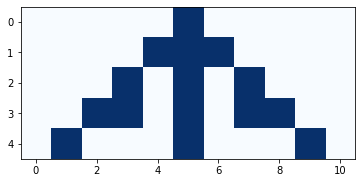

In [32]:
for i in range(1, rows):
    step2(array, i)

plot_ca(array)

In [33]:
# What we have so far is good enough for a  CA that only depends on the total number of "on" cells, but for more general CAs,
# we need a table that mapps from the configuration of the neighborhood to the future state of the center cell.

In [34]:
# The following function makes the taable by interpreting the Rule number in binary.
def make_table(rule):
    """Make the table for a given CA rule.
    rule: int 0-255
    returns: array of 8 0s and 1s"""
    rule = np.array([rule], dtype=np.uint8)
    table = np.unpackbits(rule)[::-1]
    return table

In [35]:
# Here's what it looks like as an array:
table = make_table(150)
print(table)

[0 1 1 0 1 0 0 1]


In [36]:
# If we correlate the row with the window [4, 2, 1], it treats each neighborhood as a binary number between 000 111.
window = [4, 2, 1]
c = np.correlate(array[0], window, mode='same')
print(array[0])
print(c)

[0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 1 2 4 0 0 0 0]


In [37]:
# Now we can use the result from np.correlate as an index into the table; the result is the next row of the array.
array[1] = table[c]
print(array[1])

[0 0 0 0 1 1 1 0 0 0 0]


In [38]:
# We can wrap up that code in a function:
def step3(array, i, window=[4,2,1]):
    """Compute row i of a CA."""
    row = array[i-1]
    c = np.correlate(row, window, mode='same')
    array[i] = table[c]

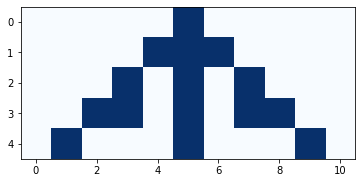

In [39]:
# And test it again.
for i in range(1, rows):
    step3(array, i)
plot_ca(array)

In [40]:
# How did I know that Rule 150 is the same as the previous CA? I wrote out the table and converted it to binary.

In [41]:
# The Cell1D object
# Cell1D encapsulates the code from the previous section.

class Cell1D:
    """Represents a 1-D a cellular automaton"""
    def __init__(self, rule, n, m=None):
        """Initializes the CA.
        
        rule: integer
        n: number of rows
        m: number of columns
        
        Attributes:
        table: rule dictionary that maps from trimple to next state.
        array: the numpy array that contains the data.
        next: the index of the next empty row.
        """
        self.table = make_table(rule)
        self.n = n
        self.m = 2*n + 1 if m is None else m
        
        self.array = np.zeros((n, self.m), dtype=np.int8)
        self.next = 0
        
    def start_single(self):
        """Starts with one cell in the middle of the top row."""
        self.array[0, self.m//2] = 1
        self.next += 1
        
    def start_random(self):
        """Start with random values in the top row."""
        self.array[0] = np.random.random(self.m).round()
        self.next += 1
        
    def start_string(self, s):
        """Start with values from a string of 1s and 0s."""
        # TODO: Check string length
        self.array[0] = np.array([int(x) for x in s])
        self.next += 1
        
    def loop(self, steps=1):
        """Executes the given number of time steps."""
        for i in range(steps):
            self.step()
            
    def step(self):
        """Executes one time step by computing the next row of the array."""
        a = self.array
        i = self.next
        window = [4, 2, 1]
        c = np.correlate(a[i-1], window, mode='same')
        a[i] = self.table[c]
        self.next += 1
        
    def draw(self, start=0, end=None):
        """Draws the CA using pyplot.imshow.
        
        start: index of the first column to be shown
        end: index of the last column to be shown
        """
        a = self.array[:, start:end]
        plt.imshow(a, cmap='Blues', alpha=0.7)
        
        # turn off axis tick marks
        plt.xticks([])
        plt.yticks([])
        

In [42]:
# The following function makes and draws a CA.
def draw_ca(rule, n=32):
    """Makes and draw a 1D CA with a given rule.
    
    rule: int rule number
    n: number of rows
    """
    ca = Cell1D(rule, n)
    ca.start_single()
    ca.loop(n-1)
    ca.draw()

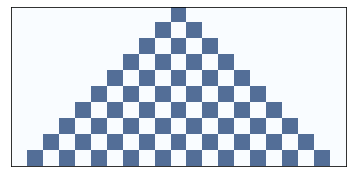

In [43]:
# Here's an example that runs a Rule 50 CA for 10 steps.
draw_ca(rule=50, n=10)

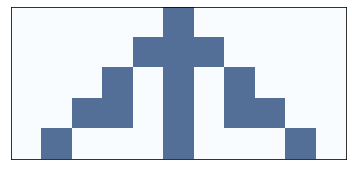

In [44]:
# Another example:
draw_ca(rule=150, n=5)

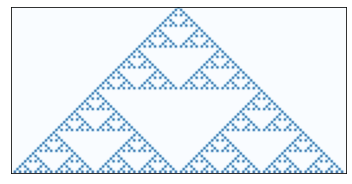

In [45]:
# And one more example showing recursive structure.
draw_ca(rule=18, n=64)

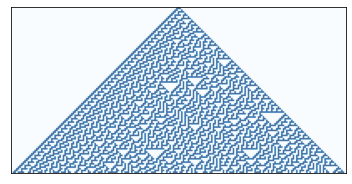

In [46]:
# Rule 30 generates a sequence of bits that is indistinguishable from random:
draw_ca(rule=30, n=100)

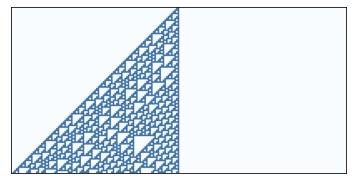

In [47]:
# And Rule 110 if Turing complete!
draw_ca(rule=110, n=100)

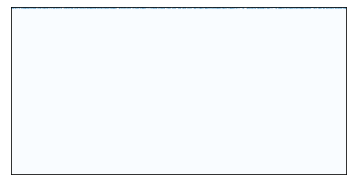

In [48]:
# Here's a linger run that has some spaceships.
np.random.seed(21)
ca = Cell1D(rule=110, n=600)
ca.start_random()
ca.loop(n-1)
ca.draw()

In [49]:
# Exercises

In [50]:
# Exercise 5.2
# This exercise asks you to experiment with Rule 110 and some of its spceships.
# Solution
# The following function makes a CA with the given rule and runs it for 'n' steps.

def run_ca(init, n=None, rule=110):
    m = len(init)
    n = m if n is None else n
    
    ca = Cell1D(rule, n, m)
    ca.start_string(init)
    ca.loop(n-1)
    return ca

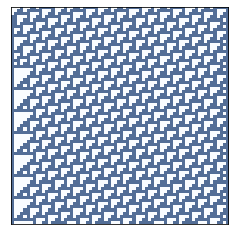

In [51]:
# Here's the background pattern.
# Notice that this implrmentation doesn't get the borders quite right.

background = '00010011011111'
ca = run_ca(background * 5)
ca.draw()

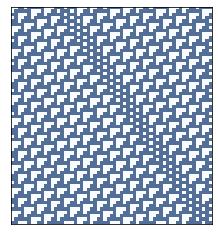

In [52]:
# Here's a spaceship that translates right.
# The parameters to 'draw' trim off the borders.

ship1  = '0001110111'

ca = run_ca(background + ship1 + background * 3)
ca.draw(start=4, end=-1)

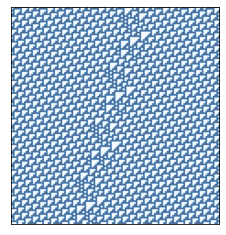

In [53]:
# Here's one that translates left:

ship2 = '1001111'

ca = run_ca(background * 5 + ship2 + background * 3)
ca.draw(start=4, end=-1)

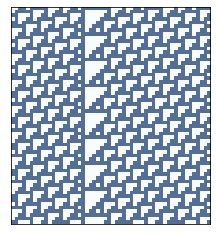

In [54]:
# And her's one that stands still.

ship3 = '111'

ca = run_ca(background * 2  + ship3 + background * 2)
ca.draw(start=4, end=-1)

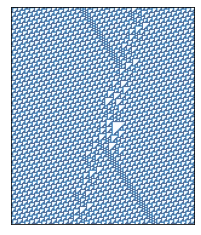

In [55]:
# When these two ships collide, they pass through each other:

init = background*4 + ship1 + background*3 + ship2 + background*3

ca = run_ca(init, n=180)
ca.draw(start=4, end=-1)

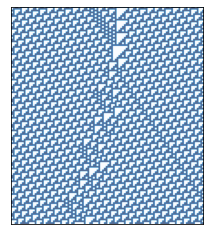

In [56]:
# When 'ship1' hits 'ship3', it creates one 'ship2' and one other spaceship we have not seen.

init = background*3 + ship1 + background + ship3 + background*3

ca= run_ca(init, n=120)
ca.draw(start=4, end=-1)

In [57]:
# Exercise 5.3
# The goal of this exercise is to implement a Turing machine.

In [58]:
# Solution

class Turing(Cell1D):
    """Represents a 1-D Turing machine."""
    
    def __init__(self, table, n, m=None):
        """Initializes the CA.
        
        tape: map from
        n: number of rows
        m: number of columns
        
        Attrinutes:
        table: rule dictionary that maps from triple to next state.
        array: the numpy array that contains the data.
        next: the index of the next empty row.
        """
        self.n = n
        self.m = n if m is None else m
        
        self.tape = np.zeros((n, self.m), dtype=np.uint8)
        self.head = np.zeros(n, dtype=np.int64)
        self.head[0] = m//2
        self.state = 'A'
        self.table = table
        self.next = 1
        
    def loop(self, steps=1):
        """Executes the given number of time steps."""
        for i in range(steps):
            try:
                self.step()
            except StopIteration:
                break
        
    def step(self):
        """Executes one time step."""
        if self.state == 'HALT':
            raise StopIteration
            
        a = self.tape
        i = self.next
        a[i] = a[i-1]
        head = self.head[i-1]
        symbol = a[i-1, head]
        print(symbol, self.state, end=': ')
        new_symbol, move, self.state = self.table[symbol, self.state]
        print(new_symbol, move, self.state)
        
        a[i, head] =new_symbol
        if move == 'R':
            head += 1
        else:
            head -= 1
        self.head[i] = head
        self.next += 1
        
    def draw(self, start=0, end=None):
        """Draws the CA using pyplot.pcolor.
        
        start: index of the first column to be shown
        end: index of the last column to be shown
        """
        # draw the cells
        a = self.tape[:, start:end]
        plt.imshow(a, cmap='Blues', alpha=0.4)
        
        # draw the read-write head
        xs = self.head
        ys = np.arange(len(xs))
        plt.plot(xs, ys, 'r.')
        

In [59]:
# Here's the action table for a 3-state busy beaver.
table ={}
table[0, 'A'] = 1, 'R', 'B'
table[0, 'B'] = 1, 'L', 'A'
table[0, 'C'] = 1, 'L', 'B'
table[1, 'A'] = 1, 'L', 'C'
table[1, 'B'] = 1, 'R', 'B'
table[1, 'C'] = 1, 'R', 'HALT'

In [60]:
# Make the Turning machine and run it
n = 15
m = 20
turing = Turing(table, n, m)

turing.loop(n-1)

0 A: 1 R B
0 B: 1 L A
1 A: 1 L C
0 C: 1 L B
0 B: 1 L A
0 A: 1 R B
1 B: 1 R B
1 B: 1 R B
1 B: 1 R B
1 B: 1 R B
0 B: 1 L A
1 A: 1 L C
1 C: 1 R HALT


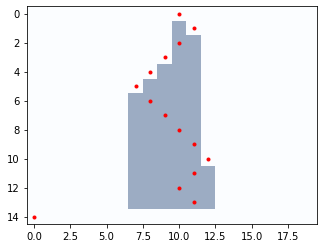

In [61]:
# And her's what it looks like.
turing.draw()